In [5]:
import glob
import pandas as pd
file_names = glob.glob("??????.csv")

total_df = None
df_cnt = 0
a = 0
for f_name in file_names:
  df = pd.read_csv(f_name)
  #print(f_name, "df:", df.shape)
  a += df.shape[0]
print(a)

4378913


In [1]:
#import prmrmr
import pandas as pd

df = pd.read_csv("to_mrmr.csv")
df.drop(['Unnamed: 0'], inplace = True, axis=1)
df = df.dropna(axis=0)

abnormal = df[df['label']==1]
normal = df[df['label']==0]
df.shape
#(3780831)
df

,label,flux,zero_month,zero_week,continuous_zero,diff_weeks,diff_week_day,diff_month,diff_month2,std_week,...,rec_week,rec_2week,rec_month,rec_day2,rec_week2,rec_2week2,rec_month2,slope,amiBAT,amiBATQ
0,0,0.004000,119,64,0,0.001935,0.001845,0.010072,0.614680,0.033301,...,168.0,337.0,339.0,0.0,0.0,1.0,2.0,-1.0,3.6,1
1,0,0.024000,119,64,0,0.002143,0.001054,0.009393,0.571344,0.033288,...,168.0,336.0,340.0,0.0,0.0,0.0,2.0,-1.0,3.6,1
2,0,0.000000,120,64,1,0.002208,0.001054,0.009393,0.571344,0.033288,...,168.0,336.0,341.0,0.0,0.0,0.0,2.0,-1.0,3.6,1
3,0,0.001000,120,64,0,0.002256,-0.001405,0.007153,0.433137,0.033288,...,168.0,336.0,342.0,0.0,0.0,0.0,2.0,-1.0,3.6,1
4,0,0.000000,121,65,1,0.002101,-0.002024,0.006593,0.398807,0.033309,...,168.0,336.0,343.0,0.0,0.0,0.0,2.0,-1.0,3.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856587,0,0.026405,48,5,0,0.000224,-0.007732,-0.003816,-0.186217,0.035094,...,170.0,338.0,722.0,1.0,2.0,2.0,2.0,-1.0,3.5,1
2856588,0,0.003464,48,5,0,-0.001486,-0.007122,-0.003901,-0.190327,0.033408,...,170.0,338.0,722.0,1.0,2.0,2.0,2.0,-1.0,3.5,1
2856589,0,0.000454,48,5,0,-0.001710,-0.005527,-0.003912,-0.190866,0.033409,...,170.0,338.0,722.0,1.0,2.0,2.0,2.0,-1.0,3.5,1
2856590,0,0.000060,48,5,0,-0.001740,-0.004795,-0.003914,-0.190937,0.033414,...,170.0,338.0,722.0,1.0,2.0,2.0,2.0,1.0,3.5,1


In [2]:
total_df = pd.read_csv("to_mrmr.csv").iloc[:, 1:]



window_size = 2
normal_scores = []
feature = ['zero_month',
           'continuous_zero',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]


df = total_df.dropna(axis=0)

normal = df[df['label']==0]
abnormal = df[df['label']==1]

In [20]:
print(normal.shape)
print(abnormal.shape)

(2855614, 24)
(978, 24)


In [3]:
mrmrdf = normal.sample(frac=0.01)
where = mrmrdf.shape[0]
for i in range(10):
  mrmrdf = mrmrdf.append(abnormal)

print(mrmrdf.shape)


(38336, 23)


In [3]:

print(mrmrdf.shape)
print(sum(mrmrdf['label']))

(38332, 23)
9780


In [4]:
import pymrmr
pymrmr.mRMR(mrmrdf, 'MIQ', 22)

['rec_2week2',
 'rec_day2',
 'rec_day',
 'rec_week2',
 'rec_month2',
 'rec_week',
 'amiBAT',
 'rec_2week',
 'continuous_zero',
 'rec_month',
 'zero_month',
 'amiBATQ',
 'slope',
 'flux',
 'diff_weeks',
 'diff_month',
 'zero_week',
 'diff_std',
 'diff_week_day',
 'std_week',
 'diff_month2',
 'MAD']

In [5]:
pymrmr.mRMR(mrmrdf, 'MID', 22)

['rec_2week2',
 'slope',
 'rec_day2',
 'flux',
 'diff_weeks',
 'rec_day',
 'diff_month',
 'rec_week2',
 'zero_week',
 'diff_std',
 'rec_month2',
 'diff_week_day',
 'std_week',
 'diff_month2',
 'rec_week',
 'MAD',
 'amiBAT',
 'rec_2week',
 'amiBATQ',
 'zero_month',
 'rec_month',
 'continuous_zero']

training time (sec):  30.0323588848114
training time per sample (sec):  5.253976278456611e-05
reference time (sec): 8.45224642753601
reference time per sample (sec):  3.6990461306164654e-06
[5.79477918e-05 9.70781791e-05 9.97741766e-05 ... 1.09325163e-03
 1.09325163e-03 2.48327951e-03]
크기 2284980
비정상 489
0.007877173997355267
75.1181843353517
[1.83569470e+00 8.35694701e-01 8.33636600e-01 ... 5.36547098e-05
 5.32459472e-05 5.32434411e-05]


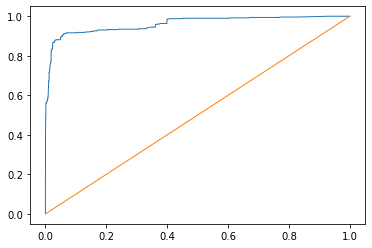

0.9616291453158979


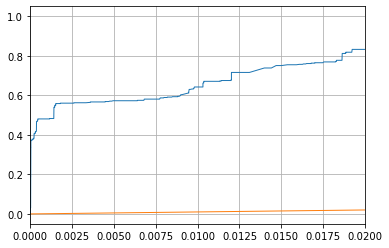

1%
fpr: 0.009999163927544472
tpr:  0.6421267893660532

314 2261648 22843 175
precision:  0.013559614803299218
recall:  0.6421267893660532
F-measure: 0.026558399062104443


TypeError: loop of ufunc does not support argument 0 of type int which has no callable sqrt method

In [2]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import time

#df = pd.read_csv("./데이터/원본/0105_0916.csv")
#count = [0] * (22)
#n_trials = 100

feature = ['flux',
           'zero_month',
           'zero_week',
           'continuous_zero',
           'diff_week_day',
           'diff_month',
           'std_week',
           'diff_std',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]

mrmrdf = normal.sample(frac=0.2)
where = mrmrdf.shape[0]
mrmrdf = mrmrdf.append(abnormal.iloc[:abnormal.shape[0]//2])

test = normal.sample(frac=0.8)
test = test.append(abnormal.iloc[abnormal.shape[0]//2:])

x = mrmrdf.iloc[:,1:].loc[:, feature].astype('float64')
y = mrmrdf.iloc[:,0]
estimator = RandomForestClassifier(100, max_depth = 4)



start = time.time()
estimator.fit(x,y)
end = time.time()
print("training time (sec): ", end - start)
print("training time per sample (sec): ", (end-start)/x.shape[0])

start = time.time()
result = estimator.predict_proba(test.iloc[:,1:].loc[:, feature].astype('float64'))[:,1]
end = time.time()
print("reference time (sec):", end-start)
print("reference time per sample (sec): ", (end-start)/(test.shape[0]))

print(result)
#assert(False)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



#new_label = 1-label
new_label = test.iloc[:,0].astype(np.int)

print('크기', len(new_label))
print('비정상', sum(new_label))

print(sum(estimator.predict_proba(normal.iloc[:100,1:].loc[:, feature].astype('float64'))[:,1] ))
print(sum(estimator.predict_proba(abnormal.iloc[:100,1:].loc[:, feature].astype('float64'))[:,1] ))

#print(result[1500:1600])
#print(new_label[1500:1600])
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, lw=1)

mean_fpr = np.linspace(0, 1, 100)
plt.xlim([0, 0.02])
plt.grid("on")
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()

print("1%")
for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))+1e-7)

print("0.5%")
for i in range(len(fpr)):
  if fpr[i] > 0.005: #0.5%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))+1e-7)

print("0.1%")
for i in range(len(fpr)):
  if fpr[i] > 0.001: #0.1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))+1e-7)


In [8]:
import pickle
data_dictionary = {}
data_dictionary['result'] = result
data_dictionary['new_label'] = new_label

with open("RF_DICT.pck", "wb") as file:
  pickle.dump(data_dictionary, file)

크기 286050
비정상 489
[1.84140478e+00 8.41404776e-01 8.35770974e-01 ... 9.03538908e-05
 9.01671109e-05 8.97776316e-05]


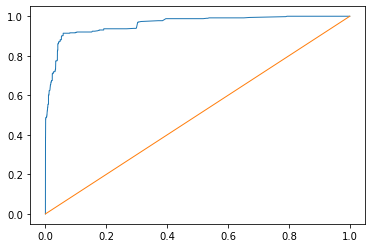

0.9608972698515332


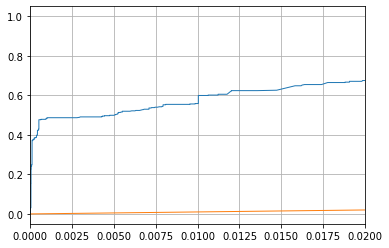

1%
fpr: 0.009948837551346297
tpr:  0.558282208588957

273 282720 2841 216
precision:  0.08766859344894026
recall:  0.558282208588957
F-measure: 0.15154038301415484
MCC: 0.2182956820049912
0.5%
fpr: 0.004997180987599847
tpr:  0.49897750511247446

244 284134 1427 245
precision:  0.14602034709754638
recall:  0.49897750511247446
F-measure: 0.22592592592592595
MCC: 0.2677790158427929
0.1%
fpr: 0.0009945335672588344
tpr:  0.48466257668711654

237 285277 284 252
precision:  0.45489443378119004
recall:  0.48466257668711654
F-measure: 0.4693069306930693
MCC: 0.4686054081767665


In [9]:
#load_data
import pickle

with open("RF_DICT.pck", "rb") as file:
  data_dictionary = pickle.load(file)
result = data_dictionary['result']
new_label = data_dictionary['new_label']

import itertools
import pandas as pd
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import mixture
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



print('크기', len(new_label))
print('비정상', sum(new_label))
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, lw=1)

mean_fpr = np.linspace(0, 1, 100)
plt.xlim([0, 0.02])
plt.grid("on")
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()

print("1%")
for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))

print("0.5%")
for i in range(len(fpr)):
  if fpr[i] > 0.005: #0.5%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))

print("0.1%")
for i in range(len(fpr)):
  if fpr[i] > 0.001: #0.1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))

In [9]:
for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    i -= 1
    break;

print("tpr: ",tpr[i])
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))

tpr:  0.8292433537832311
16220 283002 2559 3340
precision:  0.8637307630864264
recall:  0.8292433537832311
F-measure: 0.8461357886225515


TypeError: loop of ufunc does not support argument 0 of type int which has no callable sqrt method

In [4]:
new_label

1003324    3475
1478469    2729
1618764    5535
1986176    2699
1338446    6471
           ... 
2829604    3664
2829641    3701
2829693    3753
2829748    3808
2830262    4322
Name: Unnamed: 0, Length: 29045, dtype: int32

In [21]:
from sklearn.manifold import TSNE



x = normal.sample(frac=0.05).append(abnormal)
y = x.iloc[:, :1]

x = x.iloc[:, 1:]


asdf = TSNE(2).fit_transform(x)
asdf.shape

(143737, 2)

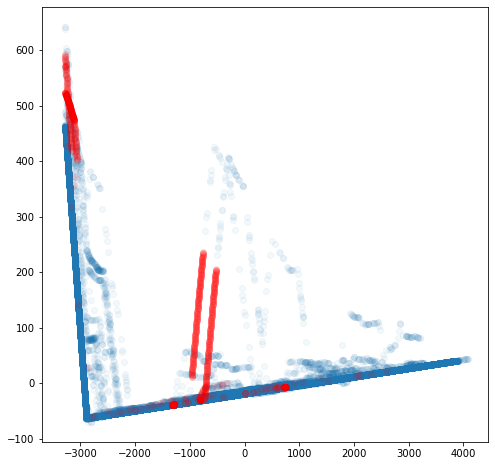

In [28]:
from sklearn.decomposition import PCA

lol = PCA(2).fit_transform(x)
lol.shape

plt.figure(figsize=[8,8])
plt.scatter(lol[:-abnormal.shape[0], 0], lol[:-abnormal.shape[0], 1], alpha=0.05)

plt.scatter(lol[-abnormal.shape[0]:, 0], lol[-abnormal.shape[0]:, 1], c='r', alpha=0.1)

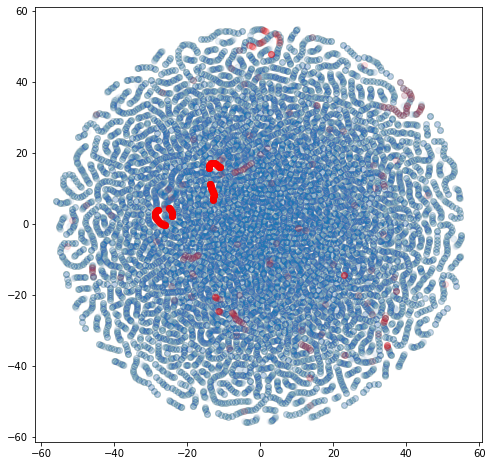

In [26]:
plt.figure(figsize=[8,8])
plt.scatter(asdf[:-abnormal.shape[0], 0], asdf[:-abnormal.shape[0], 1], alpha=0.01)

plt.scatter(asdf[-abnormal.shape[0]:, 0], asdf[-abnormal.shape[0]:, 1], c='r', alpha=0.1)

In [4]:
##RFE, linear SVC
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#df = pd.read_csv("./데이터/원본/0105_0916.csv")
count = [0] * (22)
n_trials = 100

#feature = [#'zero_month',
#           'continuous_zero',
#           'rec_day',
#           'rec_week',
#           'rec_2week',
#           'rec_month',
#           'rec_day2',
#           'rec_week2',
#           'rec_2week2',
#           'rec_month2', ]

x = scale(mrmrdf.iloc[:,1:].astype('float64'))
y = mrmrdf.iloc[:,0]
for _ in range(n_trials):
    mrmrdf = normal.sample(frac=0.01)
    where = mrmrdf.shape[0]
    for i in range(10):
      mrmrdf = mrmrdf.append(abnormal)
    #estimator = SVC(kernel='linear')
        

    estimator = RandomForestClassifier(50, max_depth = 4)
    
    selector = RFECV(estimator, min_features_to_select = 2, cv = 2)


    x = scale(mrmrdf.iloc[:,1:].astype('float64'))
    y = mrmrdf.iloc[:,0]

    selector.fit(x, y)
    print("after")
    print(selector.grid_scores_)
    print(selector.estimator_.feature_importances_)
    print(selector.support_)
    #print(selector.decision_function)
    print(selector.score(x, y))

    mask = selector.support_

    for i in range(len(mask)):
        if mask[i] == True:
            count[i] += 1
    
print(count)
print(sum(count)/n_trials)
print(selector.score(x, y))
print(selector.score(x[:where], y[:where]))
print(selector.score(x[where:], y[where:]))

after
[0.95946369 0.95862896 0.95865505 0.9596202  0.95972454 0.95993322
 0.96037667 0.96702838 0.96058535 0.9608462  0.96108097 0.96063752
 0.9615505  0.96152442 0.9617331  0.96144616 0.96194178 0.96134182
 0.96131573 0.96149833 0.96110705]
[0.03477533 0.01758031 0.02967156 0.13990092 0.30083669 0.0043186
 0.17590201 0.23785606 0.05915852]
[ True  True False False False False False False False False False  True
  True  True  True False  True  True  True False False False]
0.9610809682804674
after
[0.95784641 0.95852462 0.95844637 0.96616757 0.96006365 0.95995931
 0.95977671 0.96068969 0.96035058 0.96324604 0.96358514 0.96092446
 0.96095054 0.96139399 0.9682283  0.96340255 0.96301127 0.96100271
 0.96089837 0.96087229 0.96071578]
[0.01880991 0.01761678 0.0025427  0.00745437 0.0141359  0.00831237
 0.00564092 0.00825515 0.04391367 0.15118665 0.25456845 0.03184639
 0.01482651 0.11215528 0.21933787 0.08939708]
[ True  True  True  True False  True  True False  True  True False  True
  True  

after
[0.95672475 0.95852462 0.95870722 0.95899416 0.96024624 0.96053318
 0.96066361 0.96095054 0.96095054 0.96134182 0.96061144 0.96152442
 0.96188961 0.96181135 0.96757617 0.96676753 0.96196786 0.96149833
 0.96209829 0.96217654 0.9617331 ]
[0.03877229 0.01074715 0.01862926 0.00649467 0.01260411 0.00580931
 0.0045042  0.00763941 0.02292515 0.15614509 0.2038209  0.00582817
 0.0288846  0.17106388 0.22945    0.07668182]
[ True  True  True  True False  True  True  True False  True False  True
  True  True  True  True  True  True  True False False False]
0.9623591402337228
after
[0.95920284 0.95834203 0.9583942  0.95915067 0.95948977 0.95948977
 0.95972454 0.96590672 0.96042884 0.96076795 0.96128965 0.96097663
 0.9610288  0.96128965 0.96139399 0.96447204 0.96259391 0.96139399
 0.96118531 0.96149833 0.9615505 ]
[0.03060037 0.0162556  0.03337269 0.12619075 0.30413215 0.02118373
 0.05933202 0.09880083 0.31013186]
[ True False False False False  True False False False False False  True
  True 

after
[0.9576899  0.95836811 0.95784641 0.95888982 0.95959412 0.95948977
 0.96061144 0.96053318 0.96048101 0.96092446 0.96105488 0.96115922
 0.96063752 0.96110705 0.96355906 0.966298   0.96095054 0.96095054
 0.96110705 0.96108097 0.96175918]
[0.02843307 0.01331763 0.01186948 0.00614025 0.00869076 0.00669121
 0.00394326 0.0053508  0.006956   0.08750233 0.10197828 0.26592588
 0.05833318 0.04338213 0.08443039 0.17393602 0.09311933]
[ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False]
0.9609766277128547
after
[0.95868114 0.95907241 0.95938543 0.96687187 0.96661102 0.96037667
 0.96087229 0.96108097 0.96113314 0.96071578 0.9608462  0.9613679
 0.9613679  0.96134182 0.96152442 0.9615505  0.96282867 0.96183744
 0.96126356 0.96147225 0.96157659]
[0.1401399  0.44829255 0.08593779 0.31404562 0.01158414]
[False False False False False False False False False False False False
  True  True False False  True  True  True

after
[0.95948977 0.95894199 0.95883765 0.95964629 0.9594376  0.95904633
 0.95920284 0.96003756 0.96554153 0.96379382 0.96068969 0.9608462
 0.9608462  0.96108097 0.96108097 0.96624583 0.9610288  0.96121139
 0.96118531 0.96092446 0.96095054]
[0.02268564 0.01871496 0.01221166 0.00510076 0.01315645 0.00545848
 0.0027561  0.00282263 0.00996826 0.01423561 0.15196016 0.19410066
 0.04279583 0.07175514 0.11582612 0.20541741 0.11103413]
[ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False]
0.9617330968280468
after
[0.95669866 0.95857679 0.95826377 0.95920284 0.95896807 0.95948977
 0.95969846 0.95972454 0.9594376  0.95964629 0.9603245  0.96123748
 0.96095054 0.9613679  0.96142008 0.96507199 0.9608462  0.96301127
 0.96108097 0.96134182 0.96113314]
[0.03652523 0.01781248 0.01784677 0.00503509 0.00066821 0.00941857
 0.00538401 0.0054581  0.00996434 0.02882143 0.17639938 0.19052275
 0.00291787 0.02994765 0.14162801 0.21

after
[0.95888982 0.95842028 0.9582116  0.95870722 0.95946369 0.96029841
 0.96042884 0.96024624 0.9610288  0.96413293 0.96335038 0.96128965
 0.96178527 0.9620722  0.96376774 0.96705447 0.96316778 0.9617331
 0.96162876 0.96162876 0.96175918]
[0.02196477 0.01490179 0.01994192 0.00431142 0.00519912 0.00966957
 0.00690095 0.00349936 0.01029132 0.01503912 0.17983908 0.13739
 0.03395859 0.03423884 0.18289468 0.2607964  0.05916305]
[ True  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True False False False]
0.9623330550918197
after
[0.95977671 0.95888982 0.95922892 0.95975063 0.96022016 0.96035058
 0.96022016 0.96079403 0.96053318 0.96118531 0.96121139 0.96087229
 0.96131573 0.9613679  0.96392425 0.96131573 0.96423727 0.96160267
 0.96134182 0.9613679  0.96175918]
[0.02070087 0.02336632 0.02628395 0.00889516 0.00583384 0.01170782
 0.00570573 0.00352227 0.0083885  0.0084954  0.01712401 0.13286069
 0.14064464 0.07792515 0.05379453 0.16923

after
[0.95933326 0.95907241 0.95881156 0.95956803 0.95985497 0.9605071
 0.96082012 0.96058535 0.9605071  0.96071578 0.96264608 0.9608462
 0.96121139 0.96126356 0.96160267 0.96144616 0.96131573 0.96149833
 0.96105488 0.96128965 0.9605071 ]
[0.03180625 0.01758215 0.00908394 0.00819121 0.01493374 0.01010416
 0.14689656 0.1826975  0.08572528 0.16584309 0.25289635 0.07423978]
[ True  True  True  True False  True False False False  True False False
  True  True  True False  True  True  True False False False]
0.9617070116861436
after
[0.95763773 0.95836811 0.95818552 0.95878548 0.95972454 0.95967237
 0.95959412 0.96003756 0.9601419  0.96269825 0.96048101 0.96024624
 0.96066361 0.96089837 0.96846306 0.96126356 0.96353297 0.96128965
 0.9610288  0.96095054 0.96076795]
[0.0210181  0.02255407 0.01700196 0.00691187 0.00626843 0.01365418
 0.00681444 0.00279666 0.00909493 0.15200631 0.21642342 0.06365636
 0.01427486 0.09935725 0.22773731 0.12042985]
[ True  True  True  True  True  True  True False 

after
[0.95902024 0.95818552 0.9578725  0.95868114 0.95917675 0.95988105
 0.95956803 0.9605071  0.96089837 0.96035058 0.96074186 0.9608462
 0.96089837 0.96118531 0.96345472 0.96345472 0.96306344 0.96108097
 0.96071578 0.9613679  0.96162876]
[0.01848618 0.01136322 0.02124101 0.00298046 0.01143678 0.00836959
 0.00244785 0.00717225 0.00784637 0.0487206  0.19681608 0.21780251
 0.01679801 0.057885   0.1753773  0.14299523 0.05226156]
[ True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True False False False]
0.9619417779632721
after
[0.9589159  0.95935935 0.9596202  0.96001148 0.96003756 0.96001148
 0.96040275 0.96063752 0.96061144 0.96074186 0.96053318 0.96123748
 0.96165484 0.96128965 0.96475897 0.96118531 0.96149833 0.96303735
 0.96123748 0.96152442 0.96118531]
[0.02079315 0.01559645 0.0108336  0.00592804 0.01706265 0.0051886
 0.00375126 0.00767355 0.03279777 0.15389325 0.2348734  0.01592278
 0.01492804 0.1281251  0.29898625 0.033

In [5]:
for i in range(1,len(mrmrdf.columns)):
  print(mrmrdf.columns[i], ":", count[i-1])

flux : 91
zero_month : 75
zero_week : 60
continuous_zero : 61
diff_weeks : 21
diff_week_day : 88
diff_month : 60
diff_month2 : 34
std_week : 55
diff_std : 70
MAD : 4
rec_day : 74
rec_week : 100
rec_2week : 100
rec_month : 81
rec_day2 : 78
rec_week2 : 100
rec_2week2 : 100
rec_month2 : 98
slope : 2
amiBAT : 0
amiBATQ : 0


In [6]:
a = None
for i in range(200):
  mrmrdf = normal.sample(frac=0.1)
  where = mrmrdf.shape[0]
  for i in range(20):
    mrmrdf = mrmrdf.append(abnormal)
  estimator = RandomForestClassifier(50, max_depth = 4)
  x = scale(mrmrdf.iloc[:,1:].astype('float64'))
  y = mrmrdf.iloc[:,0]

  estimator.fit(x, y)
  if a is None:
    a = estimator.feature_importances_
  else:
    a += estimator.feature_importances_
for i in range(1,len(mrmrdf.columns)):
  print(mrmrdf.columns[i], ":", a[i-1]/200)
  


flux : 0.013218932754812764
zero_month : 0.012608853413115729
zero_week : 0.011093017024049093
continuous_zero : 0.0074653131244360295
diff_weeks : 0.004415946954480846
diff_week_day : 0.0029211751159107274
diff_month : 0.008423416713137793
diff_month2 : 0.002340689965307115
std_week : 0.0036555335682581253
diff_std : 0.008978341713314054
MAD : 0.0012415305944686096
rec_day : 0.06421878438882404
rec_week : 0.1899151710551003
rec_2week : 0.14052025218627187
rec_month : 0.03494866456539158
rec_day2 : 0.061495267637871304
rec_week2 : 0.1947343954067949
rec_2week2 : 0.13716618428878513
rec_month2 : 0.10032694924344593
slope : 0.00017870055238528953
amiBAT : 0.00012948899389514439
amiBATQ : 3.390739943555647e-06


optimal number of features: 16
[0.98873858 0.98875033 0.98874026 0.98903913 0.98925572 0.99018088
 0.99022118 0.99105231 0.99103552 0.99093646 0.99120007 0.99110436
 0.9911413  0.99117321 0.99140995 0.99120847 0.99131089 0.99136798
 0.99119503 0.99126723 0.99113459]


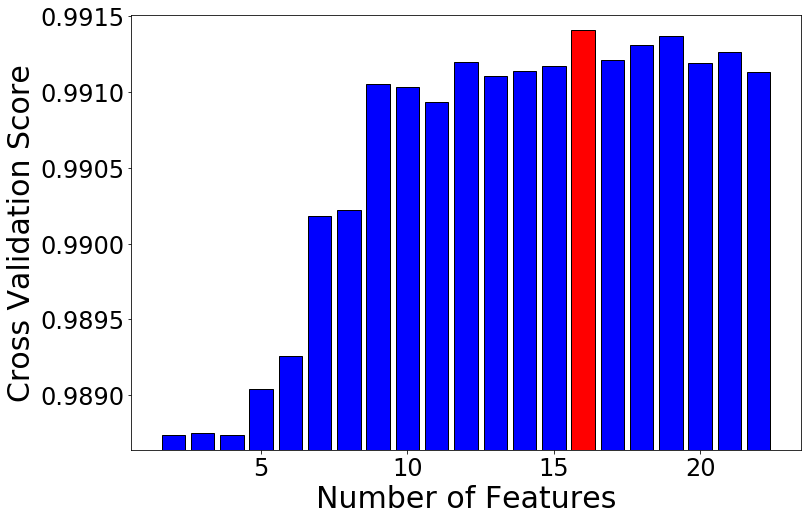

In [2]:

import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(777)

mrmrdf = normal.sample(frac=0.2)
where = mrmrdf.shape[0]
for i in range(25):
  mrmrdf = mrmrdf.append(abnormal)
#estimator = SVC(kernel='linear')


estimator = RandomForestClassifier(50, max_depth = 4)

selector = RFECV(estimator, min_features_to_select = 2, cv = 2)


x = scale(mrmrdf.iloc[:,1:].astype('float64'))
y = mrmrdf.iloc[:,0]

selector.fit(x, y)

print("optimal number of features:", selector.n_features_)

colors = ['b' for _ in range(len(selector.grid_scores_))]

colors[ selector.n_features_-2] = 'red'

print(selector.grid_scores_)
plt.figure(figsize=[12, 8])
plt.bar(range(2,2+len(selector.grid_scores_)),
        selector.grid_scores_,
        ec='k',
        color=colors)


plt.ylim([min(selector.grid_scores_)*0.9999, max(selector.grid_scores_)*1.0001])

plt.ylabel("Cross Validation Score", size=30)
plt.xlabel("Number of Features", size=30)
plt.yticks(size=24)
plt.xticks(size=24)
plt.savefig("RFECV_Num_of_Features_Selection2.png")

optimal number of features: 16
[0.98873858 0.98875033 0.98874026 0.98903913 0.98925572 0.99018088
 0.99022118 0.99105231 0.99103552 0.99093646 0.99120007 0.99110436
 0.9911413  0.99117321 0.99140995 0.99120847 0.99131089 0.99136798
 0.99119503 0.99126723 0.99113459]


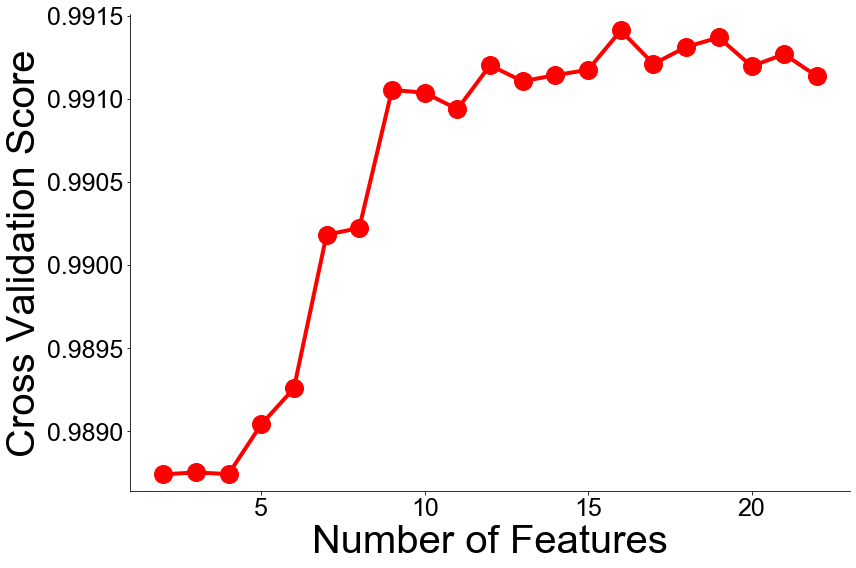

In [4]:
"""
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

#np.random.seed(777)

mrmrdf = normal.sample(frac=0.1)
where = mrmrdf.shape[0]
for i in range(25):
  mrmrdf = mrmrdf.append(abnormal)
#estimator = SVC(kernel='linear')


estimator = RandomForestClassifier(50, max_depth = 4)

selector = RFECV(estimator, min_features_to_select = 2, cv = 2)


x = scale(mrmrdf.iloc[:,1:].astype('float64'))
y = mrmrdf.iloc[:,0]

selector.fit(x, y)
"""

from matplotlib import font_manager as fm, rcParams

#fpath = 'arial.ttf'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

#prop = fm.FontProperties(fname =fpath)

print("optimal number of features:", selector.n_features_)

colors = ['b' for _ in range(len(selector.grid_scores_))]

colors[selector.n_features_-2] = 'red'

print(selector.grid_scores_)
plt.figure(figsize=[12, 8])
#plt.bar(, , color=colors)

plt.plot(range(2,2+len(selector.grid_scores_)), selector.grid_scores_,
                        lw=4, marker='o', ms=18, color="red", mfc='red')
#plt.plot([selector.n_features_], selector.grid_scores_[selector.n_features_-2],
#                        lw=4, marker='o', ms=14, color="red", mfc='white')

plt.ylim([min(selector.grid_scores_)*0.9999, max(selector.grid_scores_)*1.0001])

plt.ylabel("Cross Validation Score",
           #fontproperties=prop,
           size=40)
plt.xlabel("Number of Features", 
           #fontproperties=prop,
           size=40)
plt.yticks(
  #fontproperties=prop,
  size=25)
plt.xticks([5, 10, 15, 20],#
           #fontproperties=prop,
           size=25)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.grid()
plt.tight_layout()
plt.savefig("RFECV_Num_of_Features_Selection4.png")
plt.savefig("RFECV_Num_of_Features_Selection4.eps", format="eps")

In [ ]:
##RFE, linear SVC
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#df = pd.read_csv("./데이터/원본/0105_0916.csv")
count = [0] * (22)
n_trials = 100

feature = [#'zero_month',
           'continuous_zero',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]

x = scale(mrmrdf.iloc[:,1:].astype('float64'))
y = mrmrdf.iloc[:,0]
for _ in range(n_trials):
    mrmrdf = normal.sample(frac=0.01)
    where = mrmrdf.shape[0]
    for i in range(10):
      mrmrdf = mrmrdf.append(abnormal)
    #estimator = SVC(kernel='linear')
        

    estimator = RandomForestClassifier(50, max_depth = 4)
    
    selector = RFECV(estimator, min_features_to_select = 2, cv = 2)


    x = scale(mrmrdf.iloc[:,1:].astype('float64'))
    y = mrmrdf.iloc[:,0]

    selector.fit(x, y)
    print("after")
    print(selector.grid_scores_)
    print(selector.estimator_.feature_importances_)
    print(selector.support_)
    #print(selector.decision_function)
    print(selector.score(x, y))

    mask = selector.support_

    for i in range(len(mask)):
        if mask[i] == True:
            count[i] += 1
    
print(count)
print(sum(count)/n_trials)
print(selector.score(x, y))
print(selector.score(x[:where], y[:where]))
print(selector.score(x[where:], y[where:]))

In [17]:
##RFE, linear SVC
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#df = pd.read_csv("./데이터/원본/0105_0916.csv")
for tree_n in [5, 10, 15, 20, 50]:

  count = [0] * (22)
  n_trials = 100

  x = scale(mrmrdf.iloc[:,1:].astype('float64'))
  y = mrmrdf.iloc[:,0]
  for _ in range(n_trials):
      mrmrdf = normal.sample(frac=0.01)
      where = mrmrdf.shape[0]
      for i in range(10):
        mrmrdf = mrmrdf.append(abnormal)
      #estimator = SVC(kernel='linear')
      estimator = RandomForestClassifier(50, max_depth = 4)
      selector = RFECV(estimator, min_features_to_select = 2, cv = 2)


      x = scale(mrmrdf.iloc[:,1:].astype('float64'))
      y = mrmrdf.iloc[:,0]

      selector.fit(x, y)
      #print(selector.support_)
      #print(selector.decision_function)
      #print(selector.score(x, y))

      mask = selector.support_

      for i in range(len(mask)):
          if mask[i] == True:
              count[i] += 1

  print("tree_n: ", tree_n)
  print(count)
  print(sum(count)/n_trials)
  print(selector.score(x, y))
  print(selector.score(x[:where], y[:where]))
  print(selector.score(x[where:], y[where:]))
  print("="*20)

tree_n:  5
[0, 70, 0, 100, 1, 2, 3, 10, 10, 12, 11, 99, 100, 100, 95, 95, 100, 100, 100, 1, 44, 26]
10.79
0.9599812167379735
0.9918044270103671
0.8670756646216768
tree_n:  10
[0, 59, 2, 99, 2, 5, 11, 14, 14, 14, 14, 95, 100, 100, 97, 96, 100, 100, 100, 3, 36, 23]
10.84
0.9602681832411563
0.9911389745026619
0.8701431492842536
tree_n:  15
[0, 57, 0, 98, 0, 1, 5, 12, 15, 16, 15, 94, 100, 100, 99, 93, 100, 100, 100, 1, 33, 20]
10.59
0.9607899405196703
0.9918394508265621
0.8701431492842536
tree_n:  20
[0, 58, 0, 98, 2, 3, 5, 10, 10, 12, 13, 94, 100, 100, 99, 94, 100, 100, 100, 1, 30, 20]
10.49
0.9603986225607847
0.9923648080694872
0.8670756646216768


KeyboardInterrupt: 

In [10]:
mrmrdf.columns

Index(['label', 'flux', 'zero_month', 'zero_week', 'continuous_zero',
       'diff_weeks', 'diff_week_day', 'diff_month', 'diff_month2', 'std_week',
       'diff_std', 'MAD', 'rec_day', 'rec_week', 'rec_2week', 'rec_month',
       'rec_day2', 'rec_week2', 'rec_2week2', 'rec_month2', 'slope', 'amiBAT',
       'amiBATQ'],
      dtype='object')

In [11]:
"""
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
""""

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import glob
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture
window_size = 24
normal_scores = []
feature = [#'zero_month',
           'continuous_zero',
           #'rec_day',
           #'rec_week',
           #'rec_2week',
           #'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]

total_df = df

def kl_divergence(p, q):
  return np.sum(np.where(p != 0, p * np.log(p / (q+1e-6)+1e-6), 0))


gmm = mixture.GaussianMixture(n_components=10, covariance_type='full')

X = normal.loc[:, feature].sample(frac=0.01).to_numpy()

gmm.fit(X)

normal_prob = gmm.score_samples(X)

print(normal_prob)

#assert(False)
normal_kde = stats.gaussian_kde(normal_prob, bw_method='silverman')





total_data = total_df.dropna().loc[:, ['label'] + feature].to_numpy()

where_abnormal = np.argwhere(total_data[:,0]==1)


#assert(False)

good_score = []
bad_score = []

kde_x = np.arange(np.amin(normal_prob), np.amax(normal_prob), 0.01)

for t in range(20000):
  print("t:", t)
  i = np.random.randint(0, normal.shape[0]-window_size+1)
  w = normal.iloc[i:i+window_size].loc[:,feature].to_numpy()
  w_prob = gmm.score_samples(w)
  w_kde = stats.gaussian_kde(w_prob, bw_method='silverman')
  
  normal_q = normal_kde(kde_x)
  w_p = w_kde(kde_x)
  good_score.append(kl_divergence(w_p, normal_q))
  


for ab in where_abnormal:
  for i in range(1, window_size):
    if (ab-window_size+i < 0 or ab + i >= total_data.shape[0]):
      continue
    w = total_data[ab-window_size+i:ab+i, 1:] #0은 레이블
    w_prob = gmm.score_samples(w)
    w_kde = stats.gaussian_kde(w_prob, bw_method='silverman')
    print(min(np.amin(normal_prob), np.amin(w_prob) ), max(np.amax(normal_prob), np.amax(w_prob) ))
    #kde_x = np.arange(min(np.amin(normal_prob), np.amin(w_prob) ), max(np.amax(normal_prob), np.amax(w_prob) ), 0.01)
  
    normal_q = normal_kde(kde_x)
    w_p = w_kde(kde_x)
    bad_score.append(kl_divergence(w_p, normal_q))
  

result = np.array(good_score+bad_score)
  
label = np.array([0]*len(good_score)+[1]*len(bad_score))


  
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

print('크기', len(label))
print('비정상', sum(label))

#new_label = 1-label
new_label = label.astype(np.int)

#print(result[1500:1600])
#print(new_label[1500:1600])
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

[15.35789893 14.93763502 15.18005389 ... 14.29200146 14.94927156
 15.16463232]
t: 0
t: 1
t: 2
t: 3
t: 4
t: 5
t: 6
t: 7
t: 8
t: 9
t: 10
t: 11
t: 12
t: 13
t: 14
t: 15
t: 16
t: 17
t: 18
t: 19
t: 20
t: 21
t: 22
t: 23
t: 24
t: 25
t: 26
t: 27
t: 28
t: 29
t: 30
t: 31
t: 32
t: 33
t: 34
t: 35
t: 36
t: 37
t: 38
t: 39
t: 40
t: 41
t: 42
t: 43
t: 44
t: 45
t: 46
t: 47
t: 48
t: 49
t: 50
t: 51
t: 52
t: 53
t: 54
t: 55
t: 56
t: 57
t: 58
t: 59
t: 60
t: 61
t: 62
t: 63
t: 64
t: 65
t: 66
t: 67
t: 68
t: 69
t: 70
t: 71
t: 72
t: 73
t: 74
t: 75
t: 76
t: 77
t: 78
t: 79
t: 80
t: 81
t: 82
t: 83
t: 84
t: 85
t: 86
t: 87
t: 88
t: 89
t: 90
t: 91
t: 92
t: 93
t: 94
t: 95
t: 96
t: 97
t: 98
t: 99
t: 100
t: 101
t: 102
t: 103
t: 104
t: 105
t: 106
t: 107
t: 108
t: 109
t: 110
t: 111
t: 112
t: 113
t: 114
t: 115
t: 116
t: 117
t: 118
t: 119
t: 120
t: 121
t: 122
t: 123
t: 124
t: 125
t: 126
t: 127
t: 128
t: 129
t: 130
t: 131
t: 132
t: 133
t: 134
t: 135
t: 136
t: 137
t: 138
t: 139
t: 140
t: 141
t: 142
t: 143
t: 144
t: 145
t: 146
t:

t: 1153
t: 1154
t: 1155
t: 1156
t: 1157
t: 1158
t: 1159
t: 1160
t: 1161
t: 1162
t: 1163
t: 1164
t: 1165
t: 1166
t: 1167
t: 1168
t: 1169
t: 1170
t: 1171
t: 1172
t: 1173
t: 1174
t: 1175
t: 1176
t: 1177
t: 1178
t: 1179
t: 1180
t: 1181
t: 1182
t: 1183
t: 1184
t: 1185
t: 1186
t: 1187
t: 1188
t: 1189
t: 1190
t: 1191
t: 1192
t: 1193
t: 1194
t: 1195
t: 1196
t: 1197
t: 1198
t: 1199
t: 1200
t: 1201
t: 1202
t: 1203
t: 1204
t: 1205
t: 1206
t: 1207
t: 1208
t: 1209
t: 1210
t: 1211
t: 1212
t: 1213
t: 1214
t: 1215
t: 1216
t: 1217
t: 1218
t: 1219
t: 1220
t: 1221
t: 1222
t: 1223
t: 1224
t: 1225
t: 1226
t: 1227
t: 1228
t: 1229
t: 1230
t: 1231
t: 1232
t: 1233
t: 1234
t: 1235
t: 1236
t: 1237
t: 1238
t: 1239
t: 1240
t: 1241
t: 1242
t: 1243
t: 1244
t: 1245
t: 1246
t: 1247
t: 1248
t: 1249
t: 1250
t: 1251
t: 1252
t: 1253
t: 1254
t: 1255
t: 1256
t: 1257
t: 1258
t: 1259
t: 1260
t: 1261
t: 1262
t: 1263
t: 1264
t: 1265
t: 1266
t: 1267
t: 1268
t: 1269
t: 1270
t: 1271
t: 1272
t: 1273
t: 1274
t: 1275
t: 1276
t: 1277


t: 2178
t: 2179
t: 2180
t: 2181
t: 2182
t: 2183
t: 2184
t: 2185
t: 2186
t: 2187
t: 2188
t: 2189
t: 2190
t: 2191
t: 2192
t: 2193
t: 2194
t: 2195
t: 2196
t: 2197
t: 2198
t: 2199
t: 2200
t: 2201
t: 2202
t: 2203
t: 2204
t: 2205
t: 2206
t: 2207
t: 2208
t: 2209
t: 2210
t: 2211
t: 2212
t: 2213
t: 2214
t: 2215
t: 2216
t: 2217
t: 2218
t: 2219
t: 2220
t: 2221
t: 2222
t: 2223
t: 2224
t: 2225
t: 2226
t: 2227
t: 2228
t: 2229
t: 2230
t: 2231
t: 2232
t: 2233
t: 2234
t: 2235
t: 2236
t: 2237
t: 2238
t: 2239
t: 2240
t: 2241
t: 2242
t: 2243
t: 2244
t: 2245
t: 2246
t: 2247
t: 2248
t: 2249
t: 2250
t: 2251
t: 2252
t: 2253
t: 2254
t: 2255
t: 2256
t: 2257
t: 2258
t: 2259
t: 2260
t: 2261
t: 2262
t: 2263
t: 2264
t: 2265
t: 2266
t: 2267
t: 2268
t: 2269
t: 2270
t: 2271
t: 2272
t: 2273
t: 2274
t: 2275
t: 2276
t: 2277
t: 2278
t: 2279
t: 2280
t: 2281
t: 2282
t: 2283
t: 2284
t: 2285
t: 2286
t: 2287
t: 2288
t: 2289
t: 2290
t: 2291
t: 2292
t: 2293
t: 2294
t: 2295
t: 2296
t: 2297
t: 2298
t: 2299
t: 2300
t: 2301
t: 2302


t: 3203
t: 3204
t: 3205
t: 3206
t: 3207
t: 3208
t: 3209
t: 3210
t: 3211
t: 3212
t: 3213
t: 3214
t: 3215
t: 3216
t: 3217
t: 3218
t: 3219
t: 3220
t: 3221
t: 3222
t: 3223
t: 3224
t: 3225
t: 3226
t: 3227
t: 3228
t: 3229
t: 3230
t: 3231
t: 3232
t: 3233
t: 3234
t: 3235
t: 3236
t: 3237
t: 3238
t: 3239
t: 3240
t: 3241
t: 3242
t: 3243
t: 3244
t: 3245
t: 3246
t: 3247
t: 3248
t: 3249
t: 3250
t: 3251
t: 3252
t: 3253
t: 3254
t: 3255
t: 3256
t: 3257
t: 3258
t: 3259
t: 3260
t: 3261
t: 3262
t: 3263
t: 3264
t: 3265
t: 3266
t: 3267
t: 3268
t: 3269
t: 3270
t: 3271
t: 3272
t: 3273
t: 3274
t: 3275
t: 3276
t: 3277
t: 3278
t: 3279
t: 3280
t: 3281
t: 3282
t: 3283
t: 3284
t: 3285
t: 3286
t: 3287
t: 3288
t: 3289
t: 3290
t: 3291
t: 3292
t: 3293
t: 3294
t: 3295
t: 3296
t: 3297
t: 3298
t: 3299
t: 3300
t: 3301
t: 3302
t: 3303
t: 3304
t: 3305
t: 3306
t: 3307
t: 3308
t: 3309
t: 3310
t: 3311
t: 3312
t: 3313
t: 3314
t: 3315
t: 3316
t: 3317
t: 3318
t: 3319
t: 3320
t: 3321
t: 3322
t: 3323
t: 3324
t: 3325
t: 3326
t: 3327


t: 4228
t: 4229
t: 4230
t: 4231
t: 4232
t: 4233
t: 4234
t: 4235
t: 4236
t: 4237
t: 4238
t: 4239
t: 4240
t: 4241
t: 4242
t: 4243
t: 4244
t: 4245
t: 4246
t: 4247
t: 4248
t: 4249
t: 4250
t: 4251
t: 4252
t: 4253
t: 4254
t: 4255
t: 4256
t: 4257
t: 4258
t: 4259
t: 4260
t: 4261
t: 4262
t: 4263
t: 4264
t: 4265
t: 4266
t: 4267
t: 4268
t: 4269
t: 4270
t: 4271
t: 4272
t: 4273
t: 4274
t: 4275
t: 4276
t: 4277
t: 4278
t: 4279
t: 4280
t: 4281
t: 4282
t: 4283
t: 4284
t: 4285
t: 4286
t: 4287
t: 4288
t: 4289
t: 4290
t: 4291
t: 4292
t: 4293
t: 4294
t: 4295
t: 4296
t: 4297
t: 4298
t: 4299
t: 4300
t: 4301
t: 4302
t: 4303
t: 4304
t: 4305
t: 4306
t: 4307
t: 4308
t: 4309
t: 4310
t: 4311
t: 4312
t: 4313
t: 4314
t: 4315
t: 4316
t: 4317
t: 4318
t: 4319
t: 4320
t: 4321
t: 4322
t: 4323
t: 4324
t: 4325
t: 4326
t: 4327
t: 4328
t: 4329
t: 4330
t: 4331
t: 4332
t: 4333
t: 4334
t: 4335
t: 4336
t: 4337
t: 4338
t: 4339
t: 4340
t: 4341
t: 4342
t: 4343
t: 4344
t: 4345
t: 4346
t: 4347
t: 4348
t: 4349
t: 4350
t: 4351
t: 4352


t: 5253
t: 5254
t: 5255
t: 5256
t: 5257
t: 5258
t: 5259
t: 5260
t: 5261
t: 5262
t: 5263
t: 5264
t: 5265
t: 5266
t: 5267
t: 5268
t: 5269
t: 5270
t: 5271
t: 5272
t: 5273
t: 5274
t: 5275
t: 5276
t: 5277
t: 5278
t: 5279
t: 5280
t: 5281
t: 5282
t: 5283
t: 5284
t: 5285
t: 5286
t: 5287
t: 5288
t: 5289
t: 5290
t: 5291
t: 5292
t: 5293
t: 5294
t: 5295
t: 5296
t: 5297
t: 5298
t: 5299
t: 5300
t: 5301
t: 5302
t: 5303
t: 5304
t: 5305
t: 5306
t: 5307
t: 5308
t: 5309
t: 5310
t: 5311
t: 5312
t: 5313
t: 5314
t: 5315
t: 5316
t: 5317
t: 5318
t: 5319
t: 5320
t: 5321
t: 5322
t: 5323
t: 5324
t: 5325
t: 5326
t: 5327
t: 5328
t: 5329
t: 5330
t: 5331
t: 5332
t: 5333
t: 5334
t: 5335
t: 5336
t: 5337
t: 5338
t: 5339
t: 5340
t: 5341
t: 5342
t: 5343
t: 5344
t: 5345
t: 5346
t: 5347
t: 5348
t: 5349
t: 5350
t: 5351
t: 5352
t: 5353
t: 5354
t: 5355
t: 5356
t: 5357
t: 5358
t: 5359
t: 5360
t: 5361
t: 5362
t: 5363
t: 5364
t: 5365
t: 5366
t: 5367
t: 5368
t: 5369
t: 5370
t: 5371
t: 5372
t: 5373
t: 5374
t: 5375
t: 5376
t: 5377


t: 6278
t: 6279
t: 6280
t: 6281
t: 6282
t: 6283
t: 6284
t: 6285
t: 6286
t: 6287
t: 6288
t: 6289
t: 6290
t: 6291
t: 6292
t: 6293
t: 6294
t: 6295
t: 6296
t: 6297
t: 6298
t: 6299
t: 6300
t: 6301
t: 6302
t: 6303
t: 6304
t: 6305
t: 6306
t: 6307
t: 6308
t: 6309
t: 6310
t: 6311
t: 6312
t: 6313
t: 6314
t: 6315
t: 6316
t: 6317
t: 6318
t: 6319
t: 6320
t: 6321
t: 6322
t: 6323
t: 6324
t: 6325
t: 6326
t: 6327
t: 6328
t: 6329
t: 6330
t: 6331
t: 6332
t: 6333
t: 6334
t: 6335
t: 6336
t: 6337
t: 6338
t: 6339
t: 6340
t: 6341
t: 6342
t: 6343
t: 6344
t: 6345
t: 6346
t: 6347
t: 6348
t: 6349
t: 6350
t: 6351
t: 6352
t: 6353
t: 6354
t: 6355
t: 6356
t: 6357
t: 6358
t: 6359
t: 6360
t: 6361
t: 6362
t: 6363
t: 6364
t: 6365
t: 6366
t: 6367
t: 6368
t: 6369
t: 6370
t: 6371
t: 6372
t: 6373
t: 6374
t: 6375
t: 6376
t: 6377
t: 6378
t: 6379
t: 6380
t: 6381
t: 6382
t: 6383
t: 6384
t: 6385
t: 6386
t: 6387
t: 6388
t: 6389
t: 6390
t: 6391
t: 6392
t: 6393
t: 6394
t: 6395
t: 6396
t: 6397
t: 6398
t: 6399
t: 6400
t: 6401
t: 6402


t: 7303
t: 7304
t: 7305
t: 7306
t: 7307
t: 7308
t: 7309
t: 7310
t: 7311
t: 7312
t: 7313
t: 7314
t: 7315
t: 7316
t: 7317
t: 7318
t: 7319
t: 7320
t: 7321
t: 7322
t: 7323
t: 7324
t: 7325
t: 7326
t: 7327
t: 7328
t: 7329
t: 7330
t: 7331
t: 7332
t: 7333
t: 7334
t: 7335
t: 7336
t: 7337
t: 7338
t: 7339
t: 7340
t: 7341
t: 7342
t: 7343
t: 7344
t: 7345
t: 7346
t: 7347
t: 7348
t: 7349
t: 7350
t: 7351
t: 7352
t: 7353
t: 7354
t: 7355
t: 7356
t: 7357
t: 7358
t: 7359
t: 7360
t: 7361
t: 7362
t: 7363
t: 7364
t: 7365
t: 7366
t: 7367
t: 7368
t: 7369
t: 7370
t: 7371
t: 7372
t: 7373
t: 7374
t: 7375
t: 7376
t: 7377
t: 7378
t: 7379
t: 7380
t: 7381
t: 7382
t: 7383
t: 7384
t: 7385
t: 7386
t: 7387
t: 7388
t: 7389
t: 7390
t: 7391
t: 7392
t: 7393
t: 7394
t: 7395
t: 7396
t: 7397
t: 7398
t: 7399
t: 7400
t: 7401
t: 7402
t: 7403
t: 7404
t: 7405
t: 7406
t: 7407
t: 7408
t: 7409
t: 7410
t: 7411
t: 7412
t: 7413
t: 7414
t: 7415
t: 7416
t: 7417
t: 7418
t: 7419
t: 7420
t: 7421
t: 7422
t: 7423
t: 7424
t: 7425
t: 7426
t: 7427


t: 8328
t: 8329
t: 8330
t: 8331
t: 8332
t: 8333
t: 8334
t: 8335
t: 8336
t: 8337
t: 8338
t: 8339
t: 8340
t: 8341
t: 8342
t: 8343
t: 8344
t: 8345
t: 8346
t: 8347
t: 8348
t: 8349
t: 8350
t: 8351
t: 8352
t: 8353
t: 8354
t: 8355
t: 8356
t: 8357
t: 8358
t: 8359
t: 8360
t: 8361
t: 8362
t: 8363
t: 8364
t: 8365
t: 8366
t: 8367
t: 8368
t: 8369
t: 8370
t: 8371
t: 8372
t: 8373
t: 8374
t: 8375
t: 8376
t: 8377
t: 8378
t: 8379
t: 8380
t: 8381
t: 8382
t: 8383
t: 8384
t: 8385
t: 8386
t: 8387
t: 8388
t: 8389
t: 8390
t: 8391
t: 8392
t: 8393
t: 8394
t: 8395
t: 8396
t: 8397
t: 8398
t: 8399
t: 8400
t: 8401
t: 8402
t: 8403
t: 8404
t: 8405
t: 8406
t: 8407
t: 8408
t: 8409
t: 8410
t: 8411
t: 8412
t: 8413
t: 8414
t: 8415
t: 8416
t: 8417
t: 8418
t: 8419
t: 8420
t: 8421
t: 8422
t: 8423
t: 8424
t: 8425
t: 8426
t: 8427
t: 8428
t: 8429
t: 8430
t: 8431
t: 8432
t: 8433
t: 8434
t: 8435
t: 8436
t: 8437
t: 8438
t: 8439
t: 8440
t: 8441
t: 8442
t: 8443
t: 8444
t: 8445
t: 8446
t: 8447
t: 8448
t: 8449
t: 8450
t: 8451
t: 8452


t: 9353
t: 9354
t: 9355
t: 9356
t: 9357
t: 9358
t: 9359
t: 9360
t: 9361
t: 9362
t: 9363
t: 9364
t: 9365
t: 9366
t: 9367
t: 9368
t: 9369
t: 9370
t: 9371
t: 9372
t: 9373
t: 9374
t: 9375
t: 9376
t: 9377
t: 9378
t: 9379
t: 9380
t: 9381
t: 9382
t: 9383
t: 9384
t: 9385
t: 9386
t: 9387
t: 9388
t: 9389
t: 9390
t: 9391
t: 9392
t: 9393
t: 9394
t: 9395
t: 9396
t: 9397
t: 9398
t: 9399
t: 9400
t: 9401
t: 9402
t: 9403
t: 9404
t: 9405
t: 9406
t: 9407
t: 9408
t: 9409
t: 9410
t: 9411
t: 9412
t: 9413
t: 9414
t: 9415
t: 9416
t: 9417
t: 9418
t: 9419
t: 9420
t: 9421
t: 9422
t: 9423
t: 9424
t: 9425
t: 9426
t: 9427
t: 9428
t: 9429
t: 9430
t: 9431
t: 9432
t: 9433
t: 9434
t: 9435
t: 9436
t: 9437
t: 9438
t: 9439
t: 9440
t: 9441
t: 9442
t: 9443
t: 9444
t: 9445
t: 9446
t: 9447
t: 9448
t: 9449
t: 9450
t: 9451
t: 9452
t: 9453
t: 9454
t: 9455
t: 9456
t: 9457
t: 9458
t: 9459
t: 9460
t: 9461
t: 9462
t: 9463
t: 9464
t: 9465
t: 9466
t: 9467
t: 9468
t: 9469
t: 9470
t: 9471
t: 9472
t: 9473
t: 9474
t: 9475
t: 9476
t: 9477


t: 10336
t: 10337
t: 10338
t: 10339
t: 10340
t: 10341
t: 10342
t: 10343
t: 10344
t: 10345
t: 10346
t: 10347
t: 10348
t: 10349
t: 10350
t: 10351
t: 10352
t: 10353
t: 10354
t: 10355
t: 10356
t: 10357
t: 10358
t: 10359
t: 10360
t: 10361
t: 10362
t: 10363
t: 10364
t: 10365
t: 10366
t: 10367
t: 10368
t: 10369
t: 10370
t: 10371
t: 10372
t: 10373
t: 10374
t: 10375
t: 10376
t: 10377
t: 10378
t: 10379
t: 10380
t: 10381
t: 10382
t: 10383
t: 10384
t: 10385
t: 10386
t: 10387
t: 10388
t: 10389
t: 10390
t: 10391
t: 10392
t: 10393
t: 10394
t: 10395
t: 10396
t: 10397
t: 10398
t: 10399
t: 10400
t: 10401
t: 10402
t: 10403
t: 10404
t: 10405
t: 10406
t: 10407
t: 10408
t: 10409
t: 10410
t: 10411
t: 10412
t: 10413
t: 10414
t: 10415
t: 10416
t: 10417
t: 10418
t: 10419
t: 10420
t: 10421
t: 10422
t: 10423
t: 10424
t: 10425
t: 10426
t: 10427
t: 10428
t: 10429
t: 10430
t: 10431
t: 10432
t: 10433
t: 10434
t: 10435
t: 10436
t: 10437
t: 10438
t: 10439
t: 10440
t: 10441
t: 10442
t: 10443
t: 10444
t: 10445
t: 10446
t

t: 11247
t: 11248
t: 11249
t: 11250
t: 11251
t: 11252
t: 11253
t: 11254
t: 11255
t: 11256
t: 11257
t: 11258
t: 11259
t: 11260
t: 11261
t: 11262
t: 11263
t: 11264
t: 11265
t: 11266
t: 11267
t: 11268
t: 11269
t: 11270
t: 11271
t: 11272
t: 11273
t: 11274
t: 11275
t: 11276
t: 11277
t: 11278
t: 11279
t: 11280
t: 11281
t: 11282
t: 11283
t: 11284
t: 11285
t: 11286
t: 11287
t: 11288
t: 11289
t: 11290
t: 11291
t: 11292
t: 11293
t: 11294
t: 11295
t: 11296
t: 11297
t: 11298
t: 11299
t: 11300
t: 11301
t: 11302
t: 11303
t: 11304
t: 11305
t: 11306
t: 11307
t: 11308
t: 11309
t: 11310
t: 11311
t: 11312
t: 11313
t: 11314
t: 11315
t: 11316
t: 11317
t: 11318
t: 11319
t: 11320
t: 11321
t: 11322
t: 11323
t: 11324
t: 11325
t: 11326
t: 11327
t: 11328
t: 11329
t: 11330
t: 11331
t: 11332
t: 11333
t: 11334
t: 11335
t: 11336
t: 11337
t: 11338
t: 11339
t: 11340
t: 11341
t: 11342
t: 11343
t: 11344
t: 11345
t: 11346
t: 11347
t: 11348
t: 11349
t: 11350
t: 11351
t: 11352
t: 11353
t: 11354
t: 11355
t: 11356
t: 11357
t

t: 12158
t: 12159
t: 12160
t: 12161
t: 12162
t: 12163
t: 12164
t: 12165
t: 12166
t: 12167
t: 12168
t: 12169
t: 12170
t: 12171
t: 12172
t: 12173
t: 12174
t: 12175
t: 12176
t: 12177
t: 12178
t: 12179
t: 12180
t: 12181
t: 12182
t: 12183
t: 12184
t: 12185
t: 12186
t: 12187
t: 12188
t: 12189
t: 12190
t: 12191
t: 12192
t: 12193
t: 12194
t: 12195
t: 12196
t: 12197
t: 12198
t: 12199
t: 12200
t: 12201
t: 12202
t: 12203
t: 12204
t: 12205
t: 12206
t: 12207
t: 12208
t: 12209
t: 12210
t: 12211
t: 12212
t: 12213
t: 12214
t: 12215
t: 12216
t: 12217
t: 12218
t: 12219
t: 12220
t: 12221
t: 12222
t: 12223
t: 12224
t: 12225
t: 12226
t: 12227
t: 12228
t: 12229
t: 12230
t: 12231
t: 12232
t: 12233
t: 12234
t: 12235
t: 12236
t: 12237
t: 12238
t: 12239
t: 12240
t: 12241
t: 12242
t: 12243
t: 12244
t: 12245
t: 12246
t: 12247
t: 12248
t: 12249
t: 12250
t: 12251
t: 12252
t: 12253
t: 12254
t: 12255
t: 12256
t: 12257
t: 12258
t: 12259
t: 12260
t: 12261
t: 12262
t: 12263
t: 12264
t: 12265
t: 12266
t: 12267
t: 12268
t

t: 13069
t: 13070
t: 13071
t: 13072
t: 13073
t: 13074
t: 13075
t: 13076
t: 13077
t: 13078
t: 13079
t: 13080
t: 13081
t: 13082
t: 13083
t: 13084
t: 13085
t: 13086
t: 13087
t: 13088
t: 13089
t: 13090
t: 13091
t: 13092
t: 13093
t: 13094
t: 13095
t: 13096
t: 13097
t: 13098
t: 13099
t: 13100
t: 13101
t: 13102
t: 13103
t: 13104
t: 13105
t: 13106
t: 13107
t: 13108
t: 13109
t: 13110
t: 13111
t: 13112
t: 13113
t: 13114
t: 13115
t: 13116
t: 13117
t: 13118
t: 13119
t: 13120
t: 13121
t: 13122
t: 13123
t: 13124
t: 13125
t: 13126
t: 13127
t: 13128
t: 13129
t: 13130
t: 13131
t: 13132
t: 13133
t: 13134
t: 13135
t: 13136
t: 13137
t: 13138
t: 13139
t: 13140
t: 13141
t: 13142
t: 13143
t: 13144
t: 13145
t: 13146
t: 13147
t: 13148
t: 13149
t: 13150
t: 13151
t: 13152
t: 13153
t: 13154
t: 13155
t: 13156
t: 13157
t: 13158
t: 13159
t: 13160
t: 13161
t: 13162
t: 13163
t: 13164
t: 13165
t: 13166
t: 13167
t: 13168
t: 13169
t: 13170
t: 13171
t: 13172
t: 13173
t: 13174
t: 13175
t: 13176
t: 13177
t: 13178
t: 13179
t

t: 13980
t: 13981
t: 13982
t: 13983
t: 13984
t: 13985
t: 13986
t: 13987
t: 13988
t: 13989
t: 13990
t: 13991
t: 13992
t: 13993
t: 13994
t: 13995
t: 13996
t: 13997
t: 13998
t: 13999
t: 14000
t: 14001
t: 14002
t: 14003
t: 14004
t: 14005
t: 14006
t: 14007
t: 14008
t: 14009
t: 14010
t: 14011
t: 14012
t: 14013
t: 14014
t: 14015
t: 14016
t: 14017
t: 14018
t: 14019
t: 14020
t: 14021
t: 14022
t: 14023
t: 14024
t: 14025
t: 14026
t: 14027
t: 14028
t: 14029
t: 14030
t: 14031
t: 14032
t: 14033
t: 14034
t: 14035
t: 14036
t: 14037
t: 14038
t: 14039
t: 14040
t: 14041
t: 14042
t: 14043
t: 14044
t: 14045
t: 14046
t: 14047
t: 14048
t: 14049
t: 14050
t: 14051
t: 14052
t: 14053
t: 14054
t: 14055
t: 14056
t: 14057
t: 14058
t: 14059
t: 14060
t: 14061
t: 14062
t: 14063
t: 14064
t: 14065
t: 14066
t: 14067
t: 14068
t: 14069
t: 14070
t: 14071
t: 14072
t: 14073
t: 14074
t: 14075
t: 14076
t: 14077
t: 14078
t: 14079
t: 14080
t: 14081
t: 14082
t: 14083
t: 14084
t: 14085
t: 14086
t: 14087
t: 14088
t: 14089
t: 14090
t

t: 14891
t: 14892
t: 14893
t: 14894
t: 14895
t: 14896
t: 14897
t: 14898
t: 14899
t: 14900
t: 14901
t: 14902
t: 14903
t: 14904
t: 14905
t: 14906
t: 14907
t: 14908
t: 14909
t: 14910
t: 14911
t: 14912
t: 14913
t: 14914
t: 14915
t: 14916
t: 14917
t: 14918
t: 14919
t: 14920
t: 14921
t: 14922
t: 14923
t: 14924
t: 14925
t: 14926
t: 14927
t: 14928
t: 14929
t: 14930
t: 14931
t: 14932
t: 14933
t: 14934
t: 14935
t: 14936
t: 14937
t: 14938
t: 14939
t: 14940
t: 14941
t: 14942
t: 14943
t: 14944
t: 14945
t: 14946
t: 14947
t: 14948
t: 14949
t: 14950
t: 14951
t: 14952
t: 14953
t: 14954
t: 14955
t: 14956
t: 14957
t: 14958
t: 14959
t: 14960
t: 14961
t: 14962
t: 14963
t: 14964
t: 14965
t: 14966
t: 14967
t: 14968
t: 14969
t: 14970
t: 14971
t: 14972
t: 14973
t: 14974
t: 14975
t: 14976
t: 14977
t: 14978
t: 14979
t: 14980
t: 14981
t: 14982
t: 14983
t: 14984
t: 14985
t: 14986
t: 14987
t: 14988
t: 14989
t: 14990
t: 14991
t: 14992
t: 14993
t: 14994
t: 14995
t: 14996
t: 14997
t: 14998
t: 14999
t: 15000
t: 15001
t

크기 305121
비정상 19560
[169. 168. 167. 166. 165. 164. 163. 162. 161. 156. 155. 154. 152. 151.
 150. 148. 147. 146. 145. 144. 143. 142. 140. 137. 136. 135. 134. 133.
 132. 131. 130. 129. 128. 127. 125. 124. 123. 122. 121. 120. 119. 118.
 117. 116. 115. 114. 112. 111. 109. 108. 107. 106. 104. 103. 102. 101.
 100.  99.  98.  97.  95.  93.  91.  90.  89.  88.  87.  86.  85.  84.
  83.  82.  81.  79.  78.  77.  76.  75.  74.  73.  72.  71.  70.  68.
  67.  66.  65.  64.  62.  61.  60.  59.  58.  57.  56.  55.  54.  53.
  52.  51.  50.  48.  47.  46.  45.  43.  42.  41.  40.  39.  38.  37.
  35.  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.  24.  23.  22.
  21.  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.  10.   9.   8.
   7.   6.   5.   4.   3.   2.   1.  -0.  -1.  -2.  -3.  -4.  -5.]


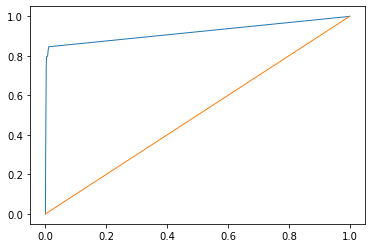

0.9201126800745368


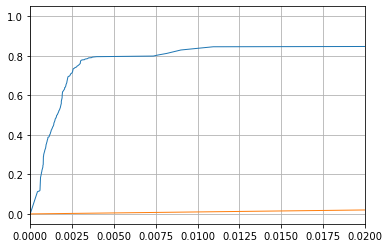

tpr:  0.8292433537832311


KeyboardInterrupt: 

In [1]:
# Baseline Threshold

import itertools
import pandas as pd
import glob
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import mixture

total_df = pd.read_csv("to_mrmr.csv").iloc[:, 1:]




window_size = 2
normal_scores = []
feature = ['flux',
           'zero_month',
           'zero_week',
           'continuous_zero',
           'diff_week_day',
           'diff_month',
           'std_week',
           'diff_std',
           'rec_day',
           'rec_week',
           'rec_2week',
           'rec_month',
           'rec_day2',
           'rec_week2',
           'rec_2week2',
           'rec_month2', ]


df = total_df.dropna(axis=0)

normal = df[df['label']==0]
abnormal = df[df['label']==1]


mrmrdf = normal.sample(frac=0.1)
where = mrmrdf.shape[0]
for i in range(20):
  mrmrdf = mrmrdf.append(abnormal)
#estimator = SVC(kernel='linear')


result = -mrmrdf['rec_week2'].to_numpy()
label = mrmrdf['label'].to_numpy()



  
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

print('크기', len(label))
print('비정상', sum(label))

#new_label = 1-label
new_label = label.astype(np.int)

#print(result[1500:1600])
#print(new_label[1500:1600])
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, lw=1)

mean_fpr = np.linspace(0, 1, 100)
plt.xlim([0, 0.02])
plt.grid("on")
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()



for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    i -= 1
    break;

print("tpr: ",tpr[i])
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))


for i in range(len(fpr)):
  if fpr[i] > 0.001: #0.01%
    i -= 1
    break;
if i == 0:
  i = 1
print("tpr: ",tpr[i])
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall))
print("MCC:", (TP*TN-FP*FN)/np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)))

training time (sec):  8.549039840698242
training time per sample (sec):  1.4956018839174548e-05
reference time (sec): 7.979795932769775
reference time per sample (sec):  3.492282616377288e-06
[0.00013275 0.00013275 0.00013275 ... 0.00194661 0.00194661 0.00135055]
크기 2284980
비정상 489
0.013275087314920664
15.824908460917024
[1.82246923e+00 8.22469234e-01 7.49761831e-01 4.93031993e-01
 3.03130807e-01 2.82209386e-01 2.79653188e-01 2.73340768e-01
 2.72633634e-01 2.72290838e-01 2.61981540e-01 2.55768178e-01
 2.53147375e-01 2.52890894e-01 2.50683207e-01 2.49819997e-01
 2.49602960e-01 2.48204300e-01 2.47132496e-01 2.44411408e-01
 2.41143595e-01 2.38443540e-01 2.37185982e-01 2.35557542e-01
 2.34863946e-01 2.32090655e-01 2.30231532e-01 2.26715818e-01
 2.22985675e-01 2.22136975e-01 2.21413228e-01 2.20115031e-01
 2.19400220e-01 2.18257586e-01 2.18031979e-01 2.16589364e-01
 2.15836103e-01 2.15538815e-01 2.15289648e-01 2.14508495e-01
 2.14391640e-01 2.14041136e-01 2.13875768e-01 2.13251755e-01
 2.126

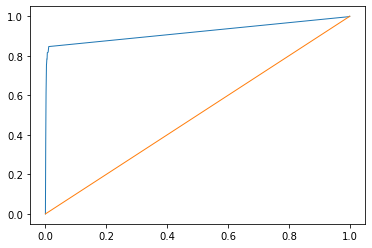

0.9200997966282108


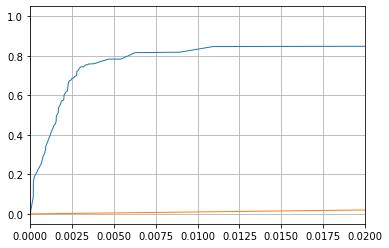

1%
fpr: 0.008932843246044743
tpr:  0.8179959100204499

400 2264084 20407 89
precision:  0.019224299514586436
recall:  0.8179959100204499
F-measure: 0.03756573555811893
MCC: 0.12458688947205836
0.5%
fpr: 0.004698201918939492
tpr:  0.7832310838445807

383 2273758 10733 106
precision:  0.034454839870457
recall:  0.7832310838445807
F-measure: 0.06600602381051365
MCC: 0.1636702963068962
0.1%
fpr: 0.0009905926528053733
tpr:  0.3537832310838446

173 2282228 2263 316
precision:  0.07101806239737274
recall:  0.3537832310838446
F-measure: 0.11829057044450358
MCC: 0.1581323493492336


In [6]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import time

#df = pd.read_csv("./데이터/원본/0105_0916.csv")
#count = [0] * (22)
#n_trials = 100

feature = [#'flux',
           #'zero_month',
           #'zero_week',
           #'continuous_zero',
           #'diff_week_day',
           #'diff_month',
           #'std_week',
           #'diff_std',
           #'rec_day',
           'rec_week',
           #'rec_2week',
           #'rec_month',
           #'rec_day2',
           'rec_week2',
           #'rec_2week2',
           #'rec_month2',
          ]

mrmrdf = normal.sample(frac=0.2)
where = mrmrdf.shape[0]
mrmrdf = mrmrdf.append(abnormal.iloc[:abnormal.shape[0]//2])

test = normal.sample(frac=0.8)
test = test.append(abnormal.iloc[abnormal.shape[0]//2:])

x = mrmrdf.iloc[:,1:].loc[:, feature].astype('float64')
y = mrmrdf.iloc[:,0]
estimator = RandomForestClassifier(100, max_depth = 4)



start = time.time()
estimator.fit(x,y)
end = time.time()
print("training time (sec): ", end - start)
print("training time per sample (sec): ", (end-start)/x.shape[0])

start = time.time()
result = estimator.predict_proba(test.iloc[:,1:].loc[:, feature].astype('float64'))[:,1]
end = time.time()
print("reference time (sec):", end-start)
print("reference time per sample (sec): ", (end-start)/(test.shape[0]))

print(result)
#assert(False)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



#new_label = 1-label
new_label = test.iloc[:,0].astype(np.int)

print('크기', len(new_label))
print('비정상', sum(new_label))

print(sum(estimator.predict_proba(normal.iloc[:100,1:].loc[:, feature].astype('float64'))[:,1] ))
print(sum(estimator.predict_proba(abnormal.iloc[:100,1:].loc[:, feature].astype('float64'))[:,1] ))

#print(result[1500:1600])
#print(new_label[1500:1600])
fpr, tpr, thesholds = roc_curve(new_label, result)
print(thesholds)
plt.figure()
plt.plot(fpr, tpr, lw=1)
mean_fpr = np.linspace(0, 1, 100)
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()
print(auc(fpr, tpr))

plt.figure()
plt.plot(fpr, tpr, lw=1)

mean_fpr = np.linspace(0, 1, 100)
plt.xlim([0, 0.02])
plt.grid("on")
plt.plot(mean_fpr, mean_fpr, lw=1)
plt.show()

print("1%")
for i in range(len(fpr)):
  if fpr[i] > 0.01: #1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)

print("0.5%")
for i in range(len(fpr)):
  if fpr[i] > 0.005: #0.5%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)

print("0.1%")
for i in range(len(fpr)):
  if fpr[i] > 0.001: #0.1%
    if (i > 0): i -= 1
    break;
print("fpr:", fpr[i])
print("tpr: ",tpr[i])
print()
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)


p_plus:  0.00034236600816637446
p_minus:  0.9996576339918336
0
100


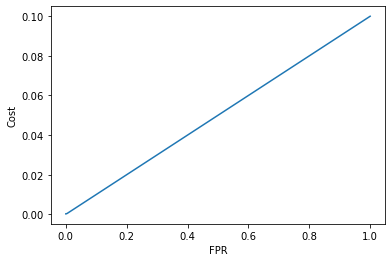

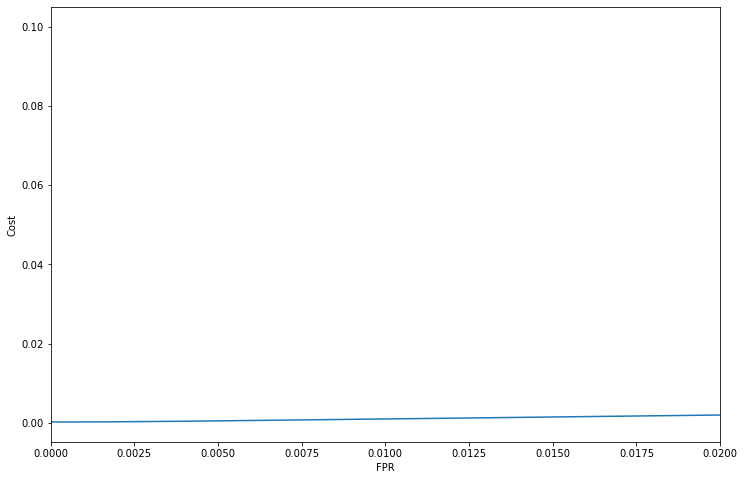

FPR at minimum cost: 0.0002473198624989111
0.00027488174936532645
92 2283926 565 397
precision:  0.1400304414003044
recall:  0.18813905930470348
F-measure: 0.16055841529793255
MCC: 0.16210472327395362


In [9]:
#총 데이터 중 정상 데이터 비율
normal_n = 2855614
#총 데이터중 비정상 데이터 비율
abnormal_n = 978

p_plus = abnormal_n/(normal_n+abnormal_n)
p_minus = normal_n/(normal_n+abnormal_n)

print("p_plus: ", p_plus)
print("p_minus: ", p_minus)
w_FNR = 0.9
w_FPR = 0.1

cost = []
for i in range(len(fpr)):
  if i % 100 == 0:
    print(i)
  predicted = result >= thesholds[i]
  TP = np.sum(np.logical_and(new_label==1,  predicted==1))
  TN = np.sum(np.logical_and(new_label==0,  predicted==0))
  FP = np.sum(np.logical_and(new_label==0,  predicted==1))
  FN = np.sum(np.logical_and(new_label==1,  predicted==0))
  FNR = FN/(FN+TP) #비정상 데이터중 미알람 비율
  FPR = FP/(FP+TN) #정상 데이터중 비정상 알람 비율
  
  cost.append(w_FNR*FNR*p_plus + w_FPR*FPR*p_minus)


plt.plot(fpr, cost)
plt.xlabel("FPR")
plt.ylabel("Cost")
plt.show()

plt.figure(figsize=[12, 8])
plt.plot(fpr, cost)
plt.xlabel("FPR")
plt.ylabel("Cost")
plt.xlim([0, 0.02])
#plt.ylim([0, cost[len(cost)//]])
plt.show()

print("FPR at minimum cost:", fpr[np.argmin(cost)])
print(np.amin(cost))


i = np.argmin(cost)
predicted = result >= thesholds[i]
TP = int(sum(np.logical_and(new_label==1,  predicted==1)))
TN = int(sum(np.logical_and(new_label==0,  predicted==0)))
FP = int(sum(np.logical_and(new_label==0,  predicted==1)))
FN = int(sum(np.logical_and(new_label==1,  predicted==0)))

print(TP,TN,FP,FN)

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)


print("precision: ", Precision)
print("recall: ", Recall)
print("F-measure:", (2*Precision*Recall)/(Precision+Recall+1e-7))
print("MCC:", (TP*TN-FP*FN)/(np.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN)*1.0))+1e-7)